In [1]:
import pickle
import pandas as pd
import os
from utils.plot_decision_trees import plot_tree


from utils.pre_process_data import get_data
from math import ceil
from utils.units import Volume, Dollar
from deap import gp, creator, base, tools
from deap.gp import Terminal
from operator import or_, and_, gt
from fitness_functions import *
from utils.plot_decision_trees import plot_tree
from utils.save_info import save_results
from genetic_functions.cx_functions import cxSubTree
from genetic_functions.mut_functions import mutation_half, mutBranch
from genetic_functions.genetic_program import GPAlgo
import matplotlib.pyplot as plt
import pendulum


In [2]:
df = get_data()
df_train= df.iloc[ : ceil(len(df)*0.7)]
df_test= df.iloc[ceil(len(df)*0.7) : ]

arg_names = list(df_train.columns)
vol_args = [arg for arg in arg_names if "volume" in arg.lower()]
dol_args = [arg for arg in arg_names if "volume" not in arg.lower()]


pset = gp.PrimitiveSetTyped("main",[Volume]*len(vol_args) + [Dollar]*len(dol_args),bool)
        #Rename the arguments:
arg_vol_mapping = {f"ARG{ind}": val for ind,val in enumerate(vol_args)}
pset.renameArguments(**arg_vol_mapping)
arg_dol_mapping = {f"ARG{len(vol_args)+ind}": val for ind,val in enumerate(dol_args)}
pset.renameArguments(**arg_dol_mapping)
#Check that all arguments were renamed:
unnamed_args=[i for i in pset.arguments if "ARG" in i]
if  unnamed_args:
    print(f"Some arguments were not renamed: {unnamed_args}")
pset.addPrimitive(gt, [Dollar,Dollar],bool)
pset.addPrimitive(lambda x:x ,[Dollar],Dollar, name="dollar placeholder")

pset.addPrimitive(gt, [Volume,Volume],bool)
pset.addPrimitive(lambda x:x ,[Volume],Volume, name="volume placeholder")


#Boolean operators:
pset.addPrimitive(and_, [bool,bool],bool)
pset.addPrimitive(or_,[bool,bool],bool)

for v_arg in vol_args:
        pset.addTerminal(v_arg,Volume)
for d_arg in dol_args:
        pset.addTerminal(d_arg,Dollar)

# --- Remove all the ARG terminals ---
pset.terminals[Volume] = [i for i in pset.terminals[Volume] if "ARG" not in i.name]
pset.terminals[Dollar] = [i for i in pset.terminals[Dollar] if "ARG" not in i.name]

def generate(pset):
    run=True
    while run:
        try:
            expr = toolbox.individual()            
            #Remove all the Lambda functions:
            expr=  list(filter(lambda x: x.name!="dollar placeholder", expr))
            expr=  list(filter(lambda x: x.name!="volume placeholder", expr))
            if len(expr)>3:
                run=False
        except IndexError:
            continue
    # return gp.PrimitiveTree(expr)
    return creator.Individual(expr)

# --- GP OPERATORS ----

creator.create("fitness", base.Fitness, weights=(1,))
creator.create("Individual", gp.PrimitiveTree, fitness= creator.fitness)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=5)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("custom_individual",generate, pset)
toolbox.register("population", tools.initRepeat, list, toolbox.custom_individual)
toolbox.register("evaluate", fitness_function, df=df_train, pset=pset)

toolbox.register("mate",       cxSubTree)
toolbox.register("select",     tools.selRanked) 
toolbox.register("mutate",     mutation_half, pset=pset)

hof   = tools.HallOfFame(maxsize=50)

#STATS:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0) 
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

c:\Users\khann\Documents\Data Science and Financial Technology\Final project\GP_trading_strategies\utils\pre_process_data.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"lag_{column.lower()}_{lag}"]= df[column].shift(lag)
c:\Users\khann\Documents\Data Science and Financial Technology\Final project\GP_trading_strategies\utils\pre_process_data.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"lag_{column.lower()}_{lag}"]= df[column].shift(lag)
/home/khann/masters/utils/pre_process_data.py:14: PerformanceWarning: 

In [5]:
run_list = os.listdir("results")

['run_p0_2024-08-10_10-14',
 'run_p0_2024-08-11_05-07',
 'run_p10_2024-08-10_10-09',
 'run_p10_2024-08-11_05-06',
 'run_p11_2024-08-10_10-12',
 'run_p11_2024-08-11_05-06',
 'run_p12_2024-08-10_10-13',
 'run_p12_2024-08-11_05-08',
 'run_p13_2024-08-10_10-15',
 'run_p13_2024-08-11_05-06',
 'run_p14_2024-08-10_10-14',
 'run_p14_2024-08-11_05-07',
 'run_p15_2024-08-10_10-14',
 'run_p15_2024-08-11_05-04',
 'run_p16_2024-08-10_10-14',
 'run_p16_2024-08-11_05-02',
 'run_p17_2024-08-10_10-14',
 'run_p17_2024-08-11_05-05',
 'run_p18_2024-08-10_10-12',
 'run_p18_2024-08-11_05-09',
 'run_p19_2024-08-10_10-13',
 'run_p19_2024-08-11_05-03',
 'run_p1_2024-08-10_10-14',
 'run_p1_2024-08-11_05-07',
 'run_p20_2024-08-10_10-14',
 'run_p20_2024-08-11_05-09',
 'run_p21_2024-08-10_10-15',
 'run_p21_2024-08-11_05-07',
 'run_p22_2024-08-10_10-14',
 'run_p22_2024-08-11_05-07',
 'run_p23_2024-08-10_10-14',
 'run_p23_2024-08-11_05-05',
 'run_p2_2024-08-10_10-13',
 'run_p2_2024-08-11_05-09',
 'run_p3_2024-08-10_

In [4]:
best_sol_pop = []
for dir in run_list:
    if os.path.isdir(rf"/home/khann/masters/results/{dir}"):
        with open(rf"/home/khann/masters/results/{dir}/hof.pkl", 'rb') as file:
        # Serialize the object and write it to the file
            hof = pickle.load(file)
            print(hof)
            best_sol_pop.append(hof[0])
            best_sol_pop.append(hof[1])

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [25]:
best_sol_pop = []
cnt=0
for dir in run_list:
    if os.path.isdir(rf"/home/khann/masters/results/{dir}"):
        if cnt == 0:
            df_tmp = pd.read_csv(rf"/home/khann/masters/results/{dir}/run_info.csv")
            df_tmp.drop('Unnamed: 0',axis=1, inplace=True)
        else:
            d = pd.read_csv(rf"/home/khann/masters/results/{dir}/run_info.csv")
            d.drop('Unnamed: 0',axis=1, inplace=True)
            df_tmp = pd.concat([df_tmp, d], ignore_index=True, sort=False)
        cnt+=1


[(258843.67323373063,),
 (136874.7730249944,),
 (198957.94447866923,),
 (153510.92718828065,),
 (188643.5038174532,),
 (188643.5038174532,),
 (137300.36745099045,),
 (132377.37481674703,),
 (214476.2964305956,),
 (124349.36046711943,),
 (186065.78393546777,),
 (163473.93420371183,),
 (200956.73364127357,),
 (170256.13913920656,),
 (259545.37235238566,),
 (259545.37235238566,),
 (168826.91704740742,),
 (146216.40780361157,),
 (214476.2964305956,),
 (164216.54501489492,),
 (225410.62338176512,),
 (150875.336001747,),
 (157277.49792384927,),
 (135785.97832030413,),
 (214476.2964305956,),
 (131457.424610527,),
 (196891.78076867748,),
 (146946.0977829253,),
 (214476.2964305956,),
 (121027.4116571392,),
 (139196.69620355094,),
 (136769.25849888113,),
 (214476.2964305956,),
 (138846.4115819129,),
 (157081.6804641192,),
 (131401.46048534702,),
 (140630.1575459576,),
 (127854.35076672035,),
 (218738.10696443333,),
 (129555.24211389845,),
 (170256.13913920656,),
 (151551.86929682773,),
 (186180.

In [26]:
df_tmp[df_tmp['strategy_value_train']>df_tmp['buy_hold_train']]


,population_number,generations,run_time,best_tree,trading_cost,buy_hold_train,strategy_value_train,buy_hold_test,strategy_value_test,time
1,100,50,23627,"or_(gt('ma_volume_37', 'ma_volume_22'), gt('ma...",1.0%,116918.977037,122542.497667,1163.710097,690.661582,2024-08-03 08:58:26.259925+00:00
4,100,50,23397,"or_(gt('ma_low_8', 'lag_low_43'), or_(gt('ma_v...",1.0%,116918.977037,170257.282652,1163.710097,1227.413153,2024-08-03 08:58:25.489257+00:00
5,100,50,23797,"or_(gt('ma_close_26', 'lag_close_42'), gt('ma_...",1.0%,116918.977037,152655.699058,1163.710097,902.983195,2024-08-03 08:58:26.471382+00:00
6,100,50,24121,"or_(and_(gt('lag_close_48', 'lag_low_48'), and...",1.0%,116918.977037,117770.378376,1163.710097,673.354055,2024-08-03 08:58:26.004065+00:00
7,100,50,24003,"or_(gt('ma_open_30', 'lag_low_25'), gt('ma_vol...",1.0%,116918.977037,127440.942940,1163.710097,1001.296615,2024-08-03 08:58:25.901060+00:00
9,100,50,23520,"or_(or_(gt('ma_volume_49', 'ma_volume_32'), or...",1.0%,116918.977037,127655.415784,1163.710097,633.208535,2024-08-03 08:58:25.934185+00:00
10,100,50,24009,"or_(gt('ma_volume_44', 'ma_volume_21'), gt('ma...",1.0%,116918.977037,167054.636840,1163.710097,332.160944,2024-08-03 08:58:23.068494+00:00
14,100,50,22840,"or_(or_(gt('ma_open_17', 'ma_low_37'), gt('ma_...",1.0%,116918.977037,129203.784002,1163.710097,669.294593,2024-08-03 08:58:26.017189+00:00
16,100,50,23104,"or_(gt('ma_open_6', 'ma_close_27'), gt('ma_vol...",1.0%,116918.977037,129255.980101,1163.710097,478.076932,2024-08-03 08:58:26.115186+00:00
17,100,50,24024,"or_(gt('ma_high_13', 'ma_open_19'), gt('ma_clo...",1.0%,116918.977037,165748.828462,1163.710097,873.909993,2024-08-03 08:58:25.932072+00:00


[]

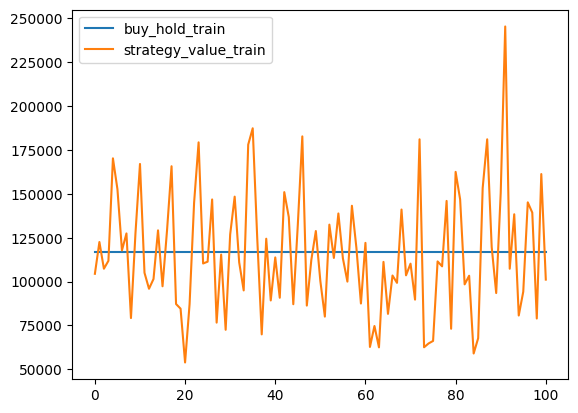

In [7]:
best_sol_pop

In [9]:
hof.items[0]

In [10]:
# res = pd.read_csv(r"/home/khann/masters/results/run_2024-08-03_08-38/run_info.csv")
# res.columns

In [23]:
best_sol_pop.sort(key = lambda x : x.fitness.values, reverse=True)

In [11]:
# plot_tree(best_sol_pop[0] , name="tree_gen1_best_sol")

In [12]:
per_list = []
for k in best_sol_pop:
    per = [i.split("_")[-1] for i in str(k).split("'") if "percentage" in i]
    if per:
        per_list.append(per)
print(per_list)

[['57'], ['57'], ['57'], ['57'], ['37'], ['57'], ['57'], ['57'], ['57'], ['37'], ['57'], ['57'], ['37'], ['57'], ['57'], ['57'], ['37'], ['37'], ['57'], ['37'], ['37'], ['57'], ['57'], ['37'], ['57'], ['57'], ['57'], ['57'], ['37'], ['37'], ['37'], ['57'], ['57'], ['57'], ['37'], ['37'], ['37'], ['57'], ['57'], ['37'], ['37'], ['37'], ['37'], ['57'], ['37'], ['37'], ['57'], ['57'], ['57'], ['57'], ['57'], ['37'], ['37', '37'], ['57'], ['57'], ['57']]


In [13]:

# with open(rf"/home/khann/masters/results/run2_2024-08-09_09-20/logbook.pkl", 'rb') as file:
# # Serialize the object and write it to the file
#     logbook = pickle.load(file)

# with open(rf"/home/khann/masters/results/run2_2024-08-09_09-20/hof.pkl", 'rb') as file:
# # Serialize the object and write it to the file
#     hof2 = pickle.load(file)

In [15]:
# max_lst = []
# for i in logbook:
#     max_lst.append(i['max'])
# x=range(0,len(max_lst))

In [27]:
lst_bsp_test = []
for i in best_sol_pop:
    lst_bsp_test.append(trading_strat(individual = i, df=df_test,pset=pset)[:2])

In [34]:
lst_bsp_train = []
for i in best_sol_pop:
    lst_bsp_train.append(trading_strat(individual = i, df=df_train ,pset=pset)[:2])

Text(0.5, 1.0, 'Fitness values of the strategies.')

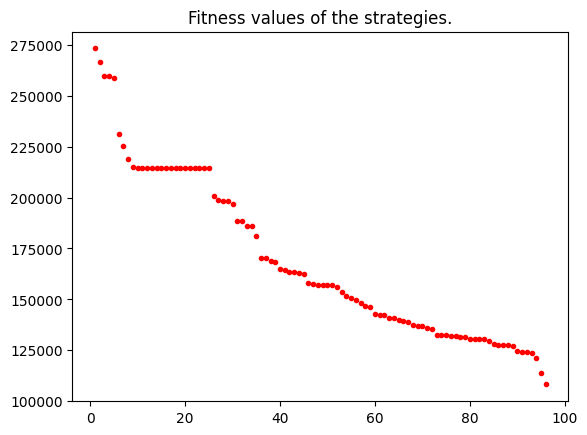

In [24]:
plt.plot(range(1,len(best_sol_pop)+1),[i.fitness.values for i in best_sol_pop],'r.')
plt.title("Fitness values of the strategies.")

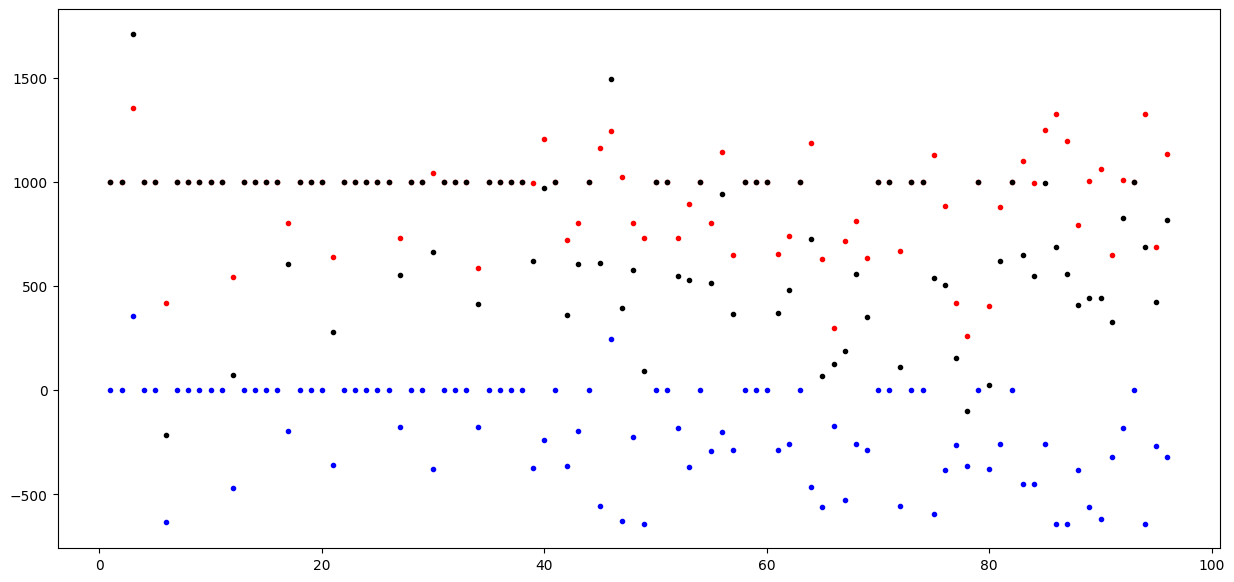

In [28]:
plt.figure(figsize=(15,7))
plt.plot(range(1,len(best_sol_pop)+1),[i[0] for i in lst_bsp_test],'r.')
plt.plot(range(1,len(best_sol_pop)+1),[i[1] for i in lst_bsp_test],'b.')
plt.plot(range(1,len(best_sol_pop)+1),[i[0]+i[1]  for i in lst_bsp_test],'k.')

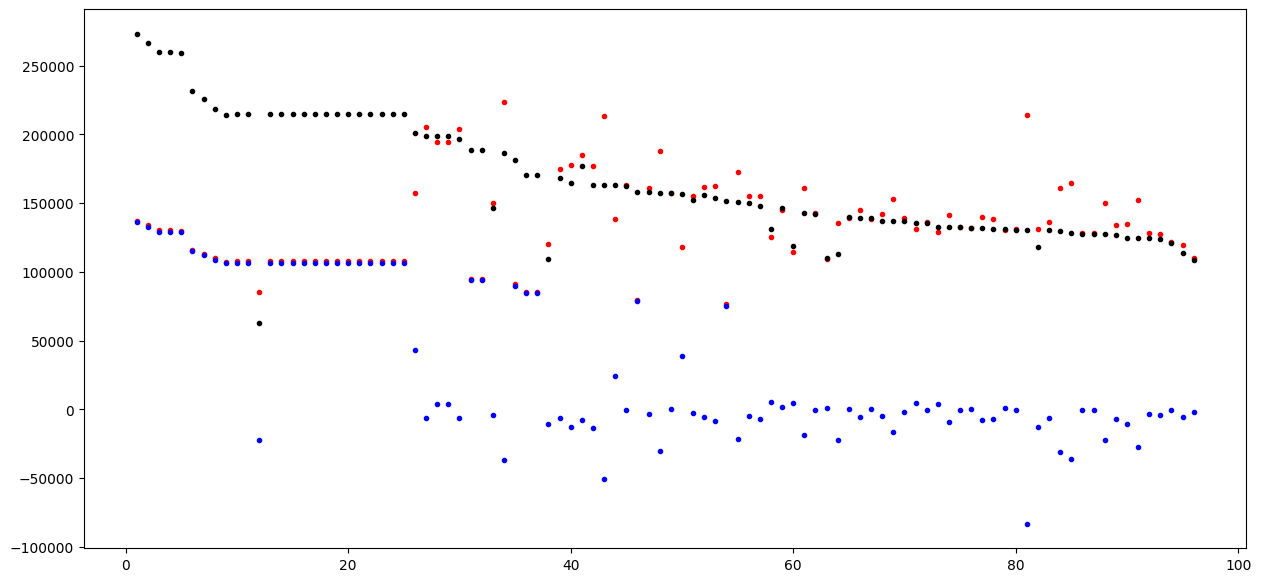

In [35]:
plt.figure(figsize=(15,7))
plt.plot(range(1,len(best_sol_pop)+1),[i[0] for i in lst_bsp_train],'r.')
plt.plot(range(1,len(best_sol_pop)+1),[i[1] for i in lst_bsp_train],'b.')
plt.plot(range(1,len(best_sol_pop)+1),[i[0]+i[1]  for i in lst_bsp_train],'k.')

In [33]:
str([i for i in best_sol_pop if i.fitness.values == (214476.2964305956,)][0])

"or_(or_(and_(gt('lag_volume_38', 'ma_volume_49'), gt('lag_volume_19', 'ma_volume_47')), gt('ma_volume_48', 'lag_volume_9')), gt('ma_volume_15', 'percentage_volume_37'))"

In [ ]:
max([i.fitness.values for i in best_sol_pop])

In [39]:
print(best_sol_pop[2])

or_(or_(gt('lag_volume_19', 'lag_volume_21'), gt('ma_close_39', 'ma_open_16')), or_(or_(gt('ma_volume_42', 'lag_volume_32'), or_(gt('ma_volume_45', 'ma_volume_8'), gt('lag_volume_9', 'lag_volume_23'))), gt('ma_high_27', 'ma_high_42')))


In [38]:
best_solution = best_sol_pop[2]
tc = 0.01
print("TRAIN")
print("Buy and hold:",(1000/df_test.iloc[0]['Open'])*df_test.iloc[-1]['Open']*(1-tc)**2)
print("mtv         :",maximum_theoretical_value(df_test))
print("strat value :",trading_strat(individual = best_solution, df=df_test,pset=pset)[0],'\n')

TRAIN
Buy and hold: 1163.7100970760914
mtv         : 177218.81839494675
strat value : 1356.3500034530482 



In [ ]:
lst = []
for i in best_sol_pop:
    lst.append(trading_strat(individual = i, df=df_test,pset=pset)[0])

In [ ]:
max(lst)

In [ ]:
lst_hof_test = []
for i in hof2:
    lst_hof_test.append(trading_strat(individual = i, df=df_test,pset=pset)[:2])

lst_hof_train = []
for i in hof2:
    lst_hof_train.append(trading_strat(individual = i, df=df_train ,pset=pset)[:2])

In [ ]:
[i for i in lst if i>1163]

In [ ]:
print("Buy and hold:",(1000/df_train.iloc[0]['Open'])*df_train.iloc[-1]['Open']*(1-tc)**2)


In [ ]:
plt.plot(range(1,len(hof2)+1),[i.fitness.values for i in hof2],'r.')
plt.title("Fitness values of the strategies.")


In [ ]:
plt.figure(figsize=(15,7))
plt.plot(range(1,len(hof2)+1),[i[0] for i in lst_hof_test],'r.')
plt.plot(range(1,len(hof2)+1),[i[1] for i in lst_hof_test],'b.')
plt.plot(range(1,len(hof2)+1),[i[0]+i[1]  for i in lst_hof_test],'k.')


plt.title("test data")

In [ ]:
[i[0]+i[1]  for i in lst_hof_test]

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(range(1,len(hof2)+1),[i[0] for i in lst_hof_train],'r.')
plt.plot(range(1,len(hof2)+1),[i[1] for i in lst_hof_train],'b.')
plt.plot(range(1,len(hof2)+1),[i[0]-i[1] for i in lst_hof_train],'k.')


plt.title("train data")
print([i[0]-i[1] for i in lst_hof_train])

In [ ]:
with open(rf"/home/khann/masters/results_run2/run_2024-08-10_02-20/hof.pkl", 'rb') as file:
        # Serialize the object and write it to the file
            hof = pickle.load(file)

In [ ]:
lst_hof_test = []
for i in hof.items:
    lst_hof_test.append(trading_strat(individual = i, df=df_test,pset=pset)[:2])

lst_hof_train = []
for i in hof.items:
    lst_hof_train.append(trading_strat(individual = i, df=df_train,pset=pset)[:2])

In [ ]:
lst_hof_test

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(range(1,len(hof)+1),[i[0] for i in lst_hof_test],'r.')
plt.plot(range(1,len(hof)+1),[i[1] for i in lst_hof_test],'b.')
plt.plot(range(1,len(hof)+1),[i[0]+i[1]  for i in lst_hof_test],'k.')

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(range(1,len(hof)+1),[i[0] for i in lst_hof_train],'r.')
plt.plot(range(1,len(hof)+1),[i[1] for i in lst_hof_train],'b.')
plt.plot(range(1,len(hof)+1),[i[0]+i[1]  for i in lst_hof_train],'k.')

In [ ]:
[i.fitness.values for i in hof.items]